In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv("Melbourne_housing_FULL.csv")

# Context and description of the data

1. Background information on the subject and field of study

2. Information about data collection:

    a. Who collected the data
    
    b. When the data was collected
    
    c. How the data was collected
    
    d. Any implications this may have on analysis

1. Background information on the subject and field of study.

The data explores the detailed information of housing located in 351 suburbs in Melhourne. Melbourne is the second-most populous city in Australia, which has prosperous education, economy, entertainment, tourism and etc. Usually, the price of housing varies in a large range, especially in a big city like Melbourne, depends on furnishment, sqft, distance to CBD and neighborhood. We are interested in what partern of housing characteristics will affect the price at different suburbs in Melbourne ciy.

In [3]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 2. Information about data collection:

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

# Exploratory Analysis of the Data

1.Summary statistics and the distributional shape of variables in the data

2.Unusual features or outliers present in the data

3.Potential relationships that may exist in the data, including, but not limited to:
   
    a. two-way tables and side-by-side bar charts for relationships between categorical data
    
    b. scatter plots for relationships between numeric data
    
    c. side-by-side histograms or boxplots for relationships between numeric and categorical data

4.Findings should be reported with readable tables or clearly labeled graphs.

5.There must also be text to explain the findings and the included tables.

In [74]:
housing = housing.loc[((housing['Rooms'].isnull() == False) & 
             (housing['Price'].isnull() == False) & 
             (housing['Distance'].isnull() == False) & 
             (housing['Bedroom2'].isnull() == False) & 
             (housing['Bathroom'].isnull() == False) &
             (housing['Postcode'].isnull() == False) &
             (housing['Landsize'].isnull() == False) &
             (housing['Lattitude'].isnull() == False) &
             (housing['Longtitude'].isnull() == False) &
             (housing['Car'].isnull() == False) & 
             (housing['BuildingArea'].isnull() == False) &
             (housing['Rooms'].isnull() == False)& 
             (housing['YearBuilt'].isnull() == False))]

In [75]:
#After we delete the NA values, lets see the description of the data:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.0,3.098909e+00,0.963786,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,8887.0,1.092902e+06,679381.904112,131000.00000,641000.00000,900000.0000,1.345000e+06,9.000000e+06
Distance,8887.0,1.119989e+01,6.813402,0.00000,6.40000,10.2000,1.390000e+01,4.740000e+01
Postcode,8887.0,3.111663e+03,112.614268,3000.00000,3044.00000,3084.0000,3.150000e+03,3.977000e+03
Bedroom2,8887.0,3.078204e+00,0.966269,0.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Bathroom,8887.0,1.646450e+00,0.721611,1.00000,1.00000,2.0000,2.000000e+00,9.000000e+00
Car,8887.0,1.692247e+00,0.975464,0.00000,1.00000,2.0000,2.000000e+00,1.000000e+01
Landsize,8887.0,5.234804e+02,1061.324228,0.00000,212.00000,478.0000,6.520000e+02,4.280000e+04
BuildingArea,8887.0,1.493095e+02,87.925580,0.00000,100.00000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8887.0,1.965753e+03,37.040876,1196.00000,1945.00000,1970.0000,2.000000e+03,2.019000e+03


In [114]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [76]:
#After we clean all the NA values in data, from the correlation table we can see that the most
#correlation with the price is "BuildingArea" and then "Rooms", the following is "Bathrooms"
corr_matrix = housing.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
BuildingArea     0.507284
Rooms            0.475074
Bathroom         0.463501
Bedroom2         0.460880
Longtitude       0.212174
Car              0.209464
Landsize         0.058375
Postcode         0.046033
Propertycount   -0.059720
Lattitude       -0.224255
Distance        -0.231212
YearBuilt       -0.313664
Name: Price, dtype: float64

### 2.Unusual features or outliers present in the data

In [10]:
housing.select_dtypes(['category']).columns
#There is no any category in this original data cannot make bar charts.

Index([], dtype='object')

In [11]:
df.select_dtypes(['category']).columns
#after I make a new column, have 1.

Index(['RangeofDistance'], dtype='object')

In [136]:
##### In this data, it have columns: Rooms, Bedrooms2, Bathroom. 
##### However, in fact, Rooms should including the bedroom and bathroom
##### and here is the unusual thing:

housing['Real Rooms'] = housing['Rooms'] - housing['Bedroom2']
housing.groupby('Real Rooms')['Bathroom'].count()
##### As table, it easily to see that after we use the number of rooms minus bedrooms, 
##### we can get the negative number and it is not make sense, also 0.
##### We believed that these three variables is not well-organize.

Real Rooms
-6.0       1
-5.0       1
-3.0       1
-2.0      12
-1.0      82
 0.0    8522
 1.0     239
 2.0      23
 3.0       5
 4.0       1
Name: Bathroom, dtype: int64

### 3.Potential relationships that may exist in the data, including, but not limited to:

##### a. two-way tables and side-by-side bar charts for relationships between categorical data

In [141]:
df= housing[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 
         'Method','Distance', 'Bedroom2', 'Bathroom', 
         'Car', 'CouncilArea','Regionname']]

In [ ]:
df["RangeofDistance"] =pd.cut(df.Distance,bins=np.arange(0,60,10),right=False)

In [ ]:
#cant make the thing I want.....
##From below, easily see that the most close to the Business Center.....
print(df.groupby('RangeofDistance')['Price'].unique())

     From below can see that as the distance far from Business Center,  the number of rooms,bedroom and Bathrooms would increase. Which mean that if you be want to buy a hourse to invest like for rent the house out, that is not a good choice for some big family.

In [145]:
print(df.groupby('RangeofDistance')['Rooms'].mean())
print(df.groupby('RangeofDistance')['Bedroom2'].mean())
print(df.groupby('RangeofDistance')['Bathroom'].mean())

RangeofDistance
[0, 10)     2.848200
[10, 20)    3.300576
[20, 30)    3.523148
[30, 40)    3.444444
[40, 50)    3.535714
Name: Rooms, dtype: float64
RangeofDistance
[0, 10)     2.819078
[10, 20)    3.285479
[20, 30)    3.521605
[30, 40)    3.439614
[40, 50)    3.535714
Name: Bedroom2, dtype: float64
RangeofDistance
[0, 10)     1.557900
[10, 20)    1.712051
[20, 30)    1.853395
[30, 40)    1.685990
[40, 50)    1.821429
Name: Bathroom, dtype: float64


### two-way tables and side-by-side bar charts for relationships between categorical data

    Since there is no categorical variables in this data, I will Change some variables into category:

In [146]:
housing['Type'] = housing['Type'].astype('category') 
housing['CouncilArea'] = housing['CouncilArea'].astype('category') 
housing['Suburb'] = housing['Suburb'].astype('category')
housing['Regionname'] = housing['Regionname'].astype('category')
housing['BuildingArea'] = housing['BuildingArea'].astype('category')

In [110]:
housing.select_dtypes(['category']).columns

Index(['Suburb', 'Type', 'BuildingArea', 'CouncilArea', 'Regionname'], dtype='object')

    h mean house,cottage,villa, semi,terrace; u mean unit, duplex; t mean townhouse
    And We can see in this data, house,cottage,villa are majority in type.

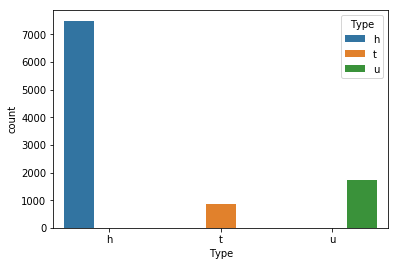

In [15]:
sns.countplot(data = df, hue = 'Type',x = 'Type')

   From the following summary table, we can see that.... 

In [16]:
print(housing.groupby('Type')['Rooms'].count())
print(housing.groupby('Type')['Car'].mean())

Type
h    23980
t     3580
u     7297
Name: Rooms, dtype: int64
Type
h    1.866697
t    1.602782
u    1.140742
Name: Car, dtype: float64


    In different CouncilArea, 

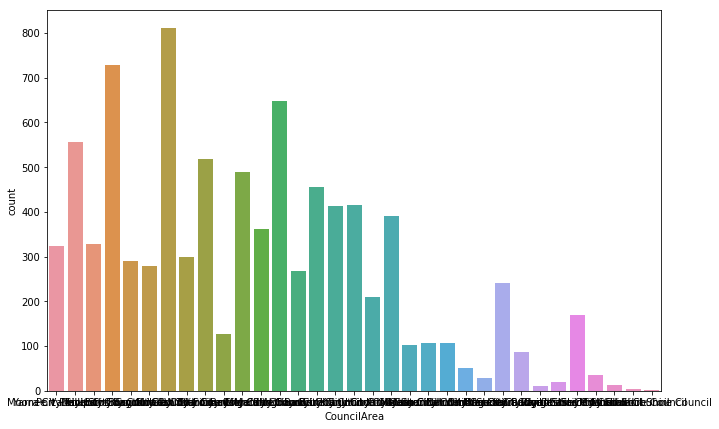

In [124]:
plt.figure(figsize=(11,7))
sns.countplot(data = df,x = 'CouncilArea')
plt.show()

    Since 

In [137]:
housing.groupby('CouncilArea')['Price'].count().sort_values(ascending=False).head()

CouncilArea
Boroondara City Council       810
Darebin City Council          729
Moreland City Council         647
Moonee Valley City Council    556
Glen Eira City Council        519
Name: Price, dtype: int64

    In this plot, we can see that Most of the houses/Apartment are concentrated in less than 10km from CBD("Central Business District "). And if the distance more than 40km, it barely not house/department exist.

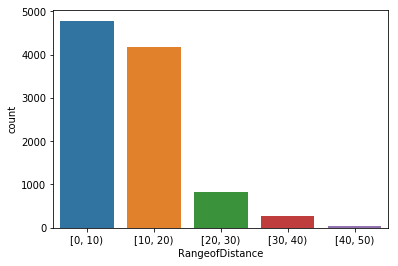

In [17]:
sns.countplot(data = df, x = 'RangeofDistance')

    need explantation

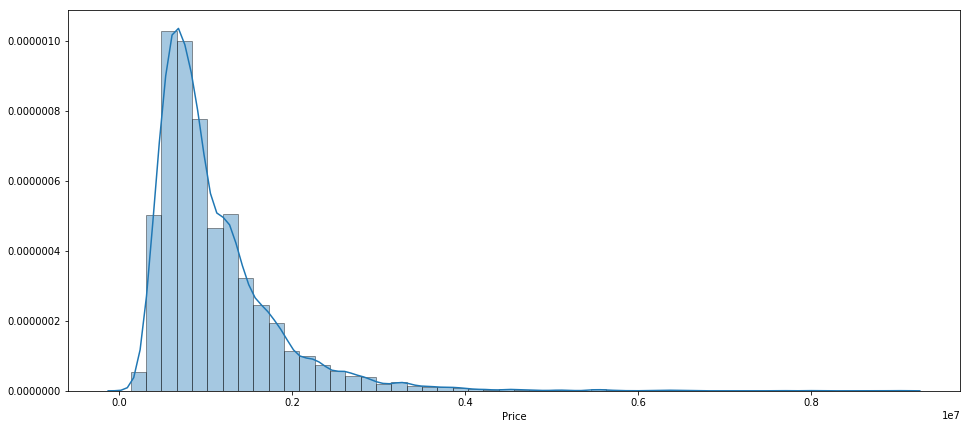

In [18]:
plt.figure(figsize=(16,7))
sns.distplot(df['Price'], kde = True,hist_kws=dict(edgecolor="k"))

## scatter plots for relationships between numeric data

    To check which variable is the numeric variable:

In [147]:
df.select_dtypes(['float64']).columns

Index(['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car'], dtype='object')

    COMMENT

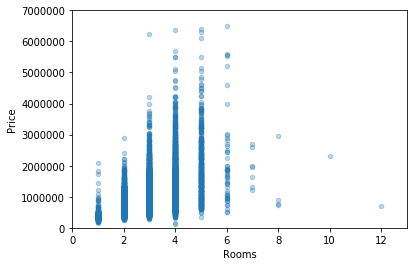

In [89]:
housing.plot(kind="scatter", x="Rooms", y="Price",
             alpha=0.3)
plt.axis([0, 13, 0, 7000000.0])
plt.show()

    COMMENT

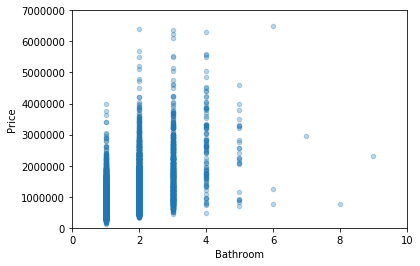

In [99]:
housing.plot(kind="scatter", x="Bathroom", y="Price",
             alpha=0.3,legend=False)
plt.axis([0, 10, 0, 7000000.0])
plt.show()

    COMMENT:

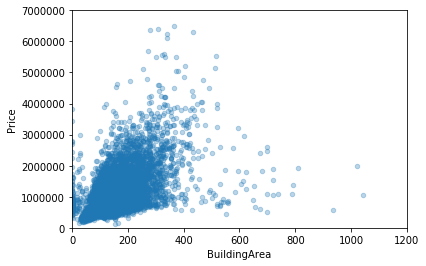

In [102]:
housing.plot(kind="scatter", x="BuildingArea", y="Price",
             alpha=0.3)
plt.axis([0, 1200, 0, 7000000.0])
plt.show()

## TRY

In [21]:
w = np.random.randint(0,3,100)
colors = np.array(['y','m','c'])
c = colors[w]
z = 100 * np.random.randint(0,10,100)

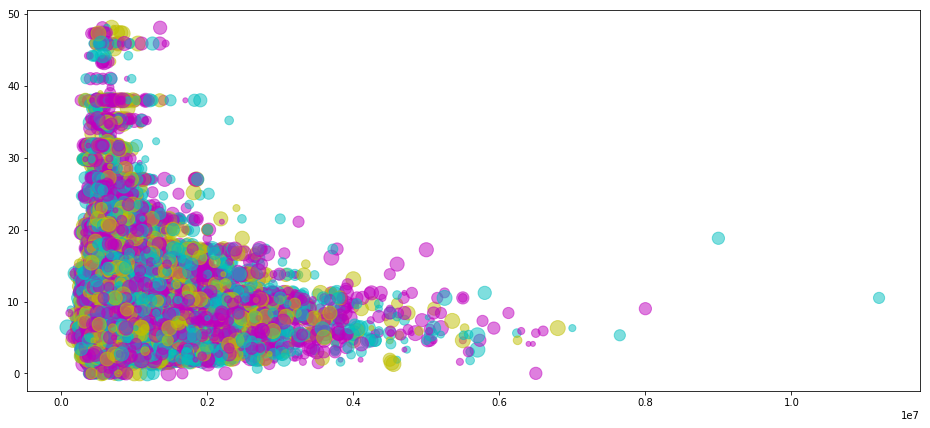

In [22]:
plt.figure(figsize=(16,7))
plt.scatter(x=housing['Price'] ,y=housing['Distance'] , s=z, c = c,marker = ".", alpha = 0.5) 
plt.show()

### side-by-side histograms or boxplots for relationships between numeric and categorical data

    Before we start to plot the plot between numeric and categoricall, To check which variables is the numeric again. 

In [39]:
df.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car'], dtype='object')

    I choose the top 4 correlation with "Price" and plot to how is going on.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


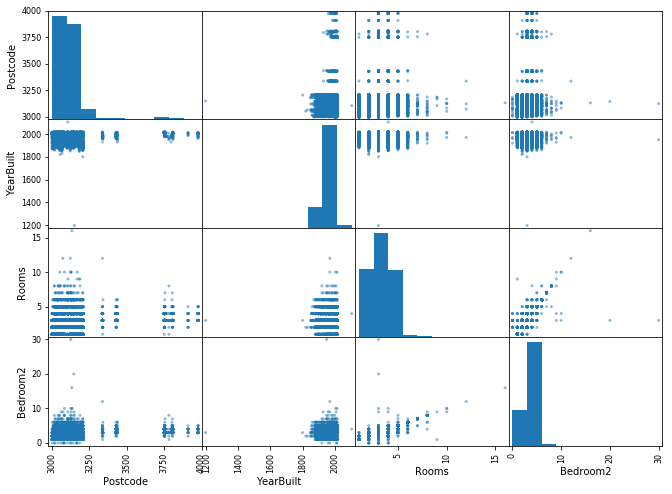

In [36]:
aa= ["Postcode","YearBuilt","Rooms","Bedroom2"]
scatter_matrix(housing[aa],figsize=(11, 8))
plt.show()

    comment

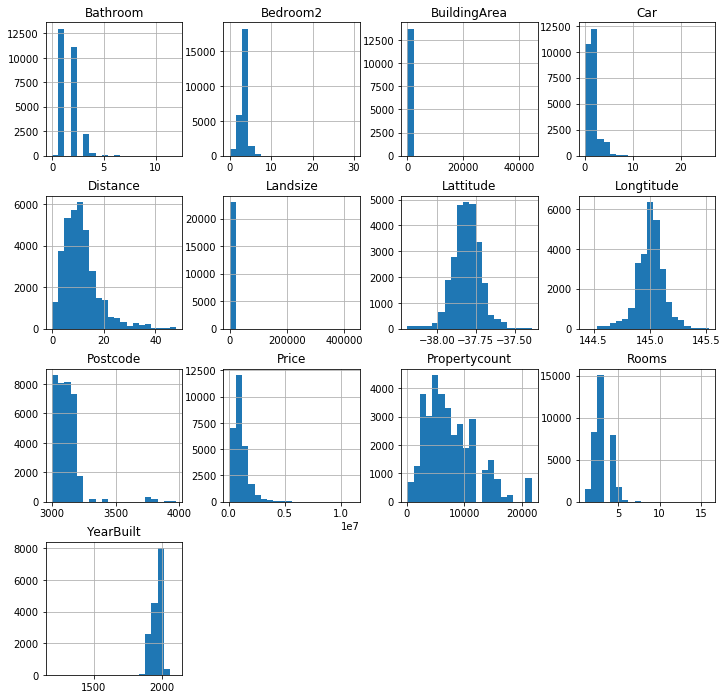

In [37]:
housing.hist(bins=20, figsize=(12,12))
plt.show()

### 4.Findings should be reported with readable tables or clearly labeled graphs

    Already commented 

### 5.There must also be text to explain the findings and the included tables.

    hahaha

# Model



## TRY

In [60]:
X =housing[['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car','Landsize',"BuildingArea","Lattitude","Longtitude"]]

# Create target variable
y = housing['Price']

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)
##
regressor = LinearRegression()


In [62]:
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

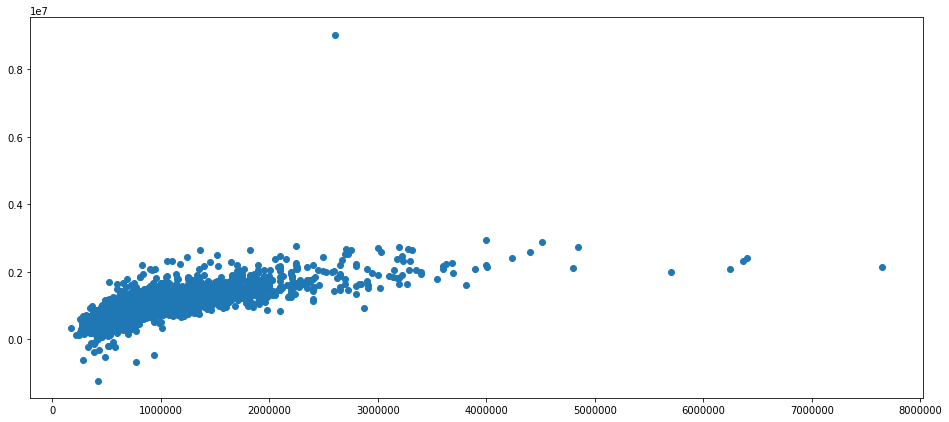

In [65]:
plt.figure(figsize=(16,7))
plt.scatter(y_test,y_pred)
plt.show()